# Prosper Loan Data Exploration
## by Ezekiel Ifeoluwa Deborah

## Introduction
> This document explores a dataset containing information loan amount and other different attributes or properties (such as borrower rate, loan status, borrower income) of 113,937 loans. To better understand the variable names used in the dataset, you can check out the data dictionary [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0).


## Preliminary Wrangling


In [129]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Gather


In [130]:
# loading dataset into a pandas dataframe
loans = pd.read_csv(r'C:\Users\HP\Desktop\project 3\prosperLoanData.csv')

In [131]:
# high-level overview of  data shape and composition
print(loans.shape)
print(loans.dtypes)
print(loans.head(10))

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object
                ListingKey  ListingNumber ListingCreationDate CreditGrade  \
0  1021339766868145413AB3B         193129             09:29.3           C   
1  10273602499503308B223C1        1209647             28:07.9         NaN   
2  0EE9337825851032864889A          81716             00:47.1          HR   
3  0EF5356002482715299901A         658116             02:35.0         NaN   
4  0F023589499656230C5E3E2         909464             38:39.1         NaN   
5  0F05359734824199381F61D        1074836             26:37.1         

In [132]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

Subsetting the dataframe

Picking only variables I plan to focus my exploration and analysis on

In [133]:
sub_loans = loans[['ListingNumber', 'Term', 'BorrowerRate', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 
                    'ProsperRating (Alpha)', 'ProsperScore', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 
                     'CreditScoreRangeUpper' ,'DebtToIncomeRatio', 'IncomeRange', 'LoanOriginalAmount']]

### Assess

In [134]:
sub_loans.head()

,ListingNumber,Term,BorrowerRate,ListingCategory (numeric),BorrowerState,Occupation,ProsperRating (Alpha),ProsperScore,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeUpper,DebtToIncomeRatio,IncomeRange,LoanOriginalAmount
0,193129,36,0.1580,0,CO,Other,NaN,NaN,Self-employed,2.0,True,659.0,0.17,"$25,000-49,999",9425
1,1209647,36,0.0920,2,CO,Professional,A,7.0,Employed,44.0,False,699.0,0.18,"$50,000-74,999",10000
2,81716,36,0.2750,0,GA,Other,NaN,NaN,Not available,NaN,False,499.0,0.06,Not displayed,3001
3,658116,36,0.0974,16,GA,Skilled Labor,A,9.0,Employed,113.0,True,819.0,0.15,"$25,000-49,999",10000
4,909464,36,0.2085,2,MN,Executive,D,4.0,Employed,44.0,True,699.0,0.26,"$100,000+",15000


In [135]:
# getting a summary of the data
sub_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   Term                       113937 non-null  int64  
 2   BorrowerRate               113937 non-null  float64
 3   ListingCategory (numeric)  113937 non-null  int64  
 4   BorrowerState              108422 non-null  object 
 5   Occupation                 110349 non-null  object 
 6   ProsperRating (Alpha)      84853 non-null   object 
 7   ProsperScore               84853 non-null   float64
 8   EmploymentStatus           111682 non-null  object 
 9   EmploymentStatusDuration   106312 non-null  float64
 10  IsBorrowerHomeowner        113937 non-null  bool   
 11  CreditScoreRangeUpper      113346 non-null  float64
 12  DebtToIncomeRatio          105383 non-null  float64
 13  IncomeRange                11

In [136]:
# checking for null values
sub_loans.isnull().sum()

ListingNumber                    0
Term                             0
BorrowerRate                     0
ListingCategory (numeric)        0
BorrowerState                 5515
Occupation                    3588
ProsperRating (Alpha)        29084
ProsperScore                 29084
EmploymentStatus              2255
EmploymentStatusDuration      7625
IsBorrowerHomeowner              0
CreditScoreRangeUpper          591
DebtToIncomeRatio             8554
IncomeRange                      0
LoanOriginalAmount               0
dtype: int64

In [137]:
# checking for duplicate values
sub_loans.duplicated().sum()

0

In [138]:
# getting statistical summary of the data
sub_loans.describe()

,ListingNumber,Term,BorrowerRate,ListingCategory (numeric),ProsperScore,EmploymentStatusDuration,CreditScoreRangeUpper,DebtToIncomeRatio,LoanOriginalAmount
count,1.139370e+05,113937.000000,113937.000000,113937.000000,84853.000000,106312.000000,113346.000000,105383.000000,113937.00000
mean,6.278857e+05,40.830248,0.192764,2.774209,5.950067,96.071582,704.567731,0.275947,8337.01385
std,3.280762e+05,10.436212,0.074818,3.996797,2.376501,94.480605,66.458275,0.551759,6245.80058
min,4.000000e+00,12.000000,0.000000,0.000000,1.000000,0.000000,19.000000,0.000000,1000.00000
25%,4.009190e+05,36.000000,0.134000,1.000000,4.000000,26.000000,679.000000,0.140000,4000.00000
50%,6.005540e+05,36.000000,0.184000,1.000000,6.000000,67.000000,699.000000,0.220000,6500.00000
75%,8.926340e+05,36.000000,0.250000,3.000000,8.000000,137.000000,739.000000,0.320000,12000.00000
max,1.255725e+06,60.000000,0.497500,20.000000,11.000000,755.000000,899.000000,10.010000,35000.00000


In [139]:
# getting count of values of loan term
sub_loans.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

In [140]:
# getting count of values in Listing category column
sub_loans['ListingCategory (numeric)'].value_counts() 

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

In [141]:
# getting count of values in Occupation column
sub_loans['Occupation'].value_counts() 

Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

In [142]:
# getting count of values in Prosper Ratings
sub_loans['ProsperRating (Alpha)'].value_counts() 

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [143]:
# getting count of values in Income Range column
sub_loans['IncomeRange'].value_counts() 

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [144]:
# getting count of values in Employment Status column
sub_loans['EmploymentStatus'].value_counts() 

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [145]:
# getting count of values in IsBorrowerHomeowner column
sub_loans['IsBorrowerHomeowner'].value_counts() 

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

### Assessments

1. BorrowerState, Occupation, ProsperRating (Alpha), ProsperScore, EmploymentStatusDuration, EmploymentStatus, CreditScoreRangeUpper, and DebtToIncomeRatio columns all contain missing values, 
2. Convert ListingNumber from an int to a string
3. Convert the numeric values in ListingCategory (numeric) values to their appropriate string values and then change datatype to string datatype
4. Replace true and false in IsBorrowerHomeOwner with HomeOwner and NotHomeOwner
5. Convert IncomeRange from string to categorical datatype, ProsperRating(Alpha) from string to categorical datatype, EmploymentStatus from a string to a categorical datatype
6. Change ProsperRating (alpha) to just ProsperRating,  ListingCategory (numeric) to just ListingCategory and CreditScoreRangeUpper to CreditScoreRange.



In [146]:
# making a copy of the dataset
loans_copy = sub_loans

### Clean

#### Issue 1

In [147]:
# dropping null values in ProsperRating column
sub_loans = sub_loans[sub_loans['ProsperRating (Alpha)'].notnull()]

In [148]:
# dropping null values in DebtToIncomeRatio column
sub_loans = sub_loans[sub_loans['DebtToIncomeRatio'].notnull()]

In [149]:
# dropping null values in Occupation column
sub_loans = sub_loans[sub_loans['Occupation'].notnull()]

In [150]:
# dropping null values in EmploymentStatusDuration column
sub_loans = sub_loans[sub_loans['EmploymentStatusDuration'].notnull()]

In [151]:
# test
sub_loans.isnull().sum()

ListingNumber                0
Term                         0
BorrowerRate                 0
ListingCategory (numeric)    0
BorrowerState                0
Occupation                   0
ProsperRating (Alpha)        0
ProsperScore                 0
EmploymentStatus             0
EmploymentStatusDuration     0
IsBorrowerHomeowner          0
CreditScoreRangeUpper        0
DebtToIncomeRatio            0
IncomeRange                  0
LoanOriginalAmount           0
dtype: int64

In [152]:
sub_loans.shape

(76216, 15)

#### Issue 2

In [153]:
# change datatype ListingNumber to string
sub_loans['ListingNumber'] = sub_loans['ListingNumber'].astype('str')
# test
print(sub_loans.ListingNumber.dtype)

object


#### Issue 3

In [154]:
# replacing ListingCategory numeric values to their appropriate string values
replace_values = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3 : 'Business', 4 : 'Personal Loan', 5 : 'Student Use', 
                    6 : 'Auto', 7: 'Other', 8 : 'Baby&Adoption', 9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans', 
                    13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle', 17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}


sub_loans.replace({"ListingCategory (numeric)": replace_values}, inplace=True)

# test
sub_loans['ListingCategory (numeric)'].value_counts()

Debt Consolidation    48604
Other                  8280
Home Improvement       6328
Business               3644
Auto                   2032
Household Expenses     1767
Medical/Dental         1382
Large Purchases         795
Taxes                   783
Wedding Loans           729
Vacation                712
Motorcycle              289
Student Use             201
Engagement Ring         201
Baby&Adoption           191
Boat                     83
Cosmetic Procedure       82
RV                       49
Green Loans              45
Not Available            19
Name: ListingCategory (numeric), dtype: int64

In [155]:
sub_loans.isnull().sum()

ListingNumber                0
Term                         0
BorrowerRate                 0
ListingCategory (numeric)    0
BorrowerState                0
Occupation                   0
ProsperRating (Alpha)        0
ProsperScore                 0
EmploymentStatus             0
EmploymentStatusDuration     0
IsBorrowerHomeowner          0
CreditScoreRangeUpper        0
DebtToIncomeRatio            0
IncomeRange                  0
LoanOriginalAmount           0
dtype: int64

#### Issue 4

In [156]:
#convert boolean to str
sub_loans.IsBorrowerHomeowner = sub_loans.IsBorrowerHomeowner.map({True: 'True', False: 'False'}) 
# replacing true and false in IsBorrowerHomeOwner to HomeOwner and NotHomeOwner
sub_loans.IsBorrowerHomeowner.replace('True', 'Home Owner', inplace=True)
sub_loans.IsBorrowerHomeowner.replace('False', 'Not Home Owner', inplace=True)
# test
sub_loans.IsBorrowerHomeowner.value_counts()

Home Owner        41454
Not Home Owner    34762
Name: IsBorrowerHomeowner, dtype: int64

#### Issue 5

In [157]:
# Convert IncomeRange from string to categorical datatype, ProsperRating(Alpha) from string to categorical datatype, EmploymentStatus from a string to a categorical datatype
ordinal_var_dict = {'IncomeRange': ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                                   '$75,000-99,999','$100,000+'],
                     'ProsperRating (Alpha)': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                     'EmploymentStatus': ['Employed', 'Full-time', 'Self-employed', 'Not available', 'Other',  'Part-time', 'Not employed', 'Retired']}  

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories=ordinal_var_dict[var])
    sub_loans[var] = sub_loans[var].astype(ordered_var)          

In [158]:
sub_loans['IsBorrowerHomeowner'] = sub_loans['IsBorrowerHomeowner'].astype('category')
sub_loans['ListingCategory (numeric)'] = sub_loans['ListingCategory (numeric)'].astype('category')
sub_loans['ProsperScore'] = sub_loans['ProsperScore'].astype('category')
sub_loans['EmploymentStatusDuration'] = sub_loans['EmploymentStatusDuration'].astype('int')
sub_loans['CreditScoreRangeUpper'] = sub_loans['CreditScoreRangeUpper'].astype(int)


In [159]:
# test
sub_loans.dtypes

ListingNumber                  object
Term                            int64
BorrowerRate                  float64
ListingCategory (numeric)    category
BorrowerState                  object
Occupation                     object
ProsperRating (Alpha)        category
ProsperScore                 category
EmploymentStatus             category
EmploymentStatusDuration        int32
IsBorrowerHomeowner          category
CreditScoreRangeUpper           int32
DebtToIncomeRatio             float64
IncomeRange                  category
LoanOriginalAmount              int64
dtype: object

#### Issue 6

In [160]:
# Change ProsperRating (alpha) to just ProsperRating and change ListingCategory (numeric) to just ListingCategory
sub_loans.columns = sub_loans.columns.str.replace('(Alpha)', '').str.replace('(numeric)', '').str.strip('()').str.replace('Upper', '')

# test
sub_loans.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_15392\1583666436.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  sub_loans.columns = sub_loans.columns.str.replace('(Alpha)', '').str.replace('(numeric)', '').str.strip('()').str.replace('Upper', '')
C:\Users\HP\AppData\Local\Temp\ipykernel_15392\1583666436.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  sub_loans.columns = sub_loans.columns.str.replace('(Alpha)', '').str.replace('(numeric)', '').str.strip('()').str.replace('Upper', '')


,ListingNumber,Term,BorrowerRate,ListingCategory,BorrowerState,Occupation,ProsperRating,ProsperScore,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRange,DebtToIncomeRatio,IncomeRange,LoanOriginalAmount
1,1209647,36,0.0920,Home Improvement,CO,Professional,A,7.0,Employed,44,Not Home Owner,699,0.18,"$50,000-74,999",10000
3,658116,36,0.0974,Motorcycle,GA,Skilled Labor,A,9.0,Employed,113,Home Owner,819,0.15,"$25,000-49,999",10000
4,909464,36,0.2085,Home Improvement,MN,Executive,D,4.0,Employed,44,Home Owner,699,0.26,"$100,000+",15000
5,1074836,60,0.1314,Debt Consolidation,NM,Professional,B,10.0,Employed,82,Home Owner,759,0.36,"$100,000+",15000
6,750899,36,0.2712,Debt Consolidation,KS,Sales - Retail,E,2.0,Employed,172,Not Home Owner,699,0.27,"$25,000-49,999",3000


In [161]:
sub_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76216 entries, 1 to 113936
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ListingNumber             76216 non-null  object  
 1   Term                      76216 non-null  int64   
 2   BorrowerRate              76216 non-null  float64 
 3   ListingCategory           76216 non-null  category
 4   BorrowerState             76216 non-null  object  
 5   Occupation                76216 non-null  object  
 6   ProsperRating             76216 non-null  category
 7   ProsperScore              76216 non-null  category
 8   EmploymentStatus          76216 non-null  category
 9   EmploymentStatusDuration  76216 non-null  int32   
 10  IsBorrowerHomeowner       76216 non-null  category
 11  CreditScoreRange          76216 non-null  int32   
 12  DebtToIncomeRatio         76216 non-null  float64 
 13  IncomeRange               76216 non-null  cat

In [162]:
sub_loans.rename(columns=lambda x: x.strip(), inplace=True)

In [163]:
# saving subset to a .csv file
sub_loans.to_csv(r'C:\Users\HP\Desktop\project 3-template\LoanData.csv')

### Subset Dataset Overview


In [164]:
print(sub_loans.shape)
print(sub_loans.dtypes)
print(sub_loans.head())

(76216, 15)
ListingNumber                 object
Term                           int64
BorrowerRate                 float64
ListingCategory             category
BorrowerState                 object
Occupation                    object
ProsperRating               category
ProsperScore                category
EmploymentStatus            category
EmploymentStatusDuration       int32
IsBorrowerHomeowner         category
CreditScoreRange               int32
DebtToIncomeRatio            float64
IncomeRange                 category
LoanOriginalAmount             int64
dtype: object
  ListingNumber  Term  BorrowerRate     ListingCategory BorrowerState  \
1       1209647    36        0.0920    Home Improvement            CO   
3        658116    36        0.0974          Motorcycle            GA   
4        909464    36        0.2085    Home Improvement            MN   
5       1074836    60        0.1314  Debt Consolidation            NM   
6        750899    36        0.2712  Debt Consolidatio

In [165]:
# statistical summary of numeric variables
sub_loans.describe()

,Term,BorrowerRate,EmploymentStatusDuration,CreditScoreRange,DebtToIncomeRatio,LoanOriginalAmount
count,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000
mean,42.760470,0.193621,104.578028,718.273643,0.258032,9294.999410
std,11.744005,0.074088,95.836443,47.280236,0.320587,6413.404265
min,12.000000,0.040000,0.000000,619.000000,0.000000,1000.000000
25%,36.000000,0.134900,32.000000,679.000000,0.150000,4000.000000
50%,36.000000,0.184500,76.000000,719.000000,0.220000,8000.000000
75%,60.000000,0.254900,150.000000,739.000000,0.320000,14603.250000
max,60.000000,0.360000,755.000000,899.000000,10.010000,35000.000000


### What is the structure of your dataset?

> There are 76,224 loan listings in this dataset with 14 features ( ListingNumber', 'Term', 'BorrowerRate', 'ListingCategory ', 'BorrowerState', 'Occupation', 'ProsperRating ', 'ProsperScore', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CreditScoreRange', 'DebtToIncomeRatio', 'IncomeRange , and 'LoanOriginalAmount). To better understand these variables, [here's a link to the data dictionary.](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)


 Some variables are numeric, some are categorical while others are integers and floats. The variables below are ordered categorical variables with their respective levels.

ProsperScore: 10, 9, 8, 7, 6, 5, 4, 3, 2, 1 <br>
ProsperRating: N/A, HR, E, D, C, B, A, AA
EmploymentStatus:Not available, Not employed, Other, Self employed, Part-time, Retired, Full-time, Employed <br>
IncomeRange: Not displayed, Not employed, $0, $1-24,999, $25,000-49,999, $50,000-74,999, $75,000-99,999, $100,000+ <br>
IsBorrowerHomeOwner: Home Owner, Not Home Owner <br>
ListingCategory: Debt Consolidation, Other, Home Improvement, Business, Auto, Household Expenses, Medical/Dental Large Purchases, Taxes, Wedding Loans, Vacation, Motorcycle, Engagement Ring, Student Use, Baby&Adoption, Boat, Cosmetic Procedure, RV, Green Loans, Not Available <br>

### What is/are the main feature(s) of interest in your dataset?

> I am most interested in figuring out what variables affect the lender's Borrower's rate as a result my main feature of interest is the 'BorrowerRate'.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that LoanOriginalAmount will have a strong effect on a lender's borrower's rate: The higher the loan, the higher the rate. I also think that IncomeRange, EmploymentStatus, ProsperRating, ProsperScore, DebtToIncomeRatio will have effects on the Borrower Rate.

In [166]:
sub_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76216 entries, 1 to 113936
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ListingNumber             76216 non-null  object  
 1   Term                      76216 non-null  int64   
 2   BorrowerRate              76216 non-null  float64 
 3   ListingCategory           76216 non-null  category
 4   BorrowerState             76216 non-null  object  
 5   Occupation                76216 non-null  object  
 6   ProsperRating             76216 non-null  category
 7   ProsperScore              76216 non-null  category
 8   EmploymentStatus          76216 non-null  category
 9   EmploymentStatusDuration  76216 non-null  int32   
 10  IsBorrowerHomeowner       76216 non-null  category
 11  CreditScoreRange          76216 non-null  int32   
 12  DebtToIncomeRatio         76216 non-null  float64 
 13  IncomeRange               76216 non-null  cat

In [167]:
sub_loans.describe()

,Term,BorrowerRate,EmploymentStatusDuration,CreditScoreRange,DebtToIncomeRatio,LoanOriginalAmount
count,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000
mean,42.760470,0.193621,104.578028,718.273643,0.258032,9294.999410
std,11.744005,0.074088,95.836443,47.280236,0.320587,6413.404265
min,12.000000,0.040000,0.000000,619.000000,0.000000,1000.000000
25%,36.000000,0.134900,32.000000,679.000000,0.150000,4000.000000
50%,36.000000,0.184500,76.000000,719.000000,0.220000,8000.000000
75%,60.000000,0.254900,150.000000,739.000000,0.320000,14603.250000
max,60.000000,0.360000,755.000000,899.000000,10.010000,35000.000000


## Univariate Exploration

Here, i'll be looking at the distribution of different variables


### Question 1

Looking at the distribution of the main variable of interest, 'BorrowerRate'

Text(0.5, 0, 'BorrowerRate (%)')

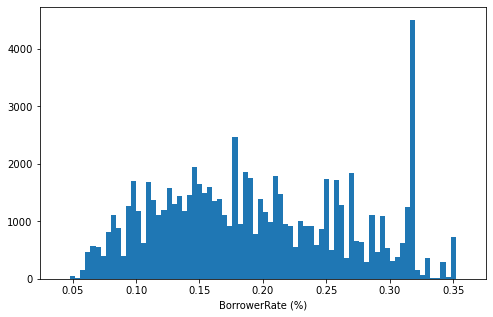

In [168]:
# an histogram plot of the BorrowerRate
binsize = 0.004
plt.figure(figsize = [8,5])
bins = np.arange(0.04, sub_loans['BorrowerRate'].max()+binsize, binsize)
plt.hist(data=sub_loans, x = 'BorrowerRate', bins = bins)
plt.xlabel('BorrowerRate (%)')



The distribution is unimodal with a high frequency of borrowers having a borrower rate of 0.32%.
Most of the given borrower rate is below 0.32% 

### Question 2

Next up, the first predictor variable of interest : LoanOriginalAmount

Text(0.5, 0, 'LoanOriginalAmount ($)')

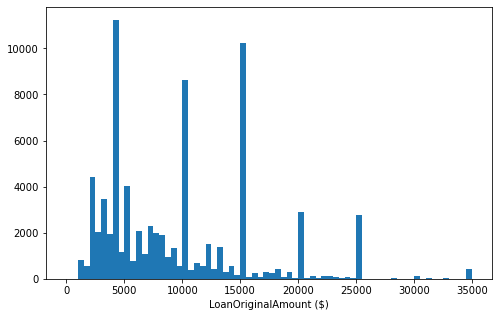

In [169]:
# plotting on a standard scaled plot
binsize = 500
plt.figure(figsize = [8,5])
bins = np.arange(0, sub_loans['LoanOriginalAmount'].max()+binsize, binsize)
plt.hist(data=sub_loans, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('LoanOriginalAmount ($)')

Here, the distribution has peaks at  around $4500, $10000, $15000, $20000, $25000.
The most frequent loan amounts being given out are $4000, $10000 and $15000.

### Question 3

The second predictor variable of interest: DebtToIncomeRatio <br>
Debt-To-Income Ratio is the percentage of your gross monthly income that is used to pay your monthly debt and determines your borrowing risk.<br>
Many lenders prefer a debt to income ratio smaller than 36%, but depending on the loan type the maximum debt-to-income ratio is 50%


Text(0.5, 0, 'DebtToIncomeRatio')

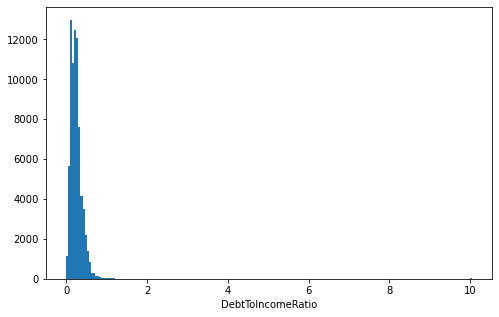

In [170]:
# plotting histogram distribution on a standard scale
binsize = 0.05
plt.figure(figsize = [8,5])
bins = np.arange(0, sub_loans['DebtToIncomeRatio'].max()+binsize, binsize)
plt.hist(data=sub_loans, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('DebtToIncomeRatio')

Text(0.5, 0, 'DebtToIncomeRatio')

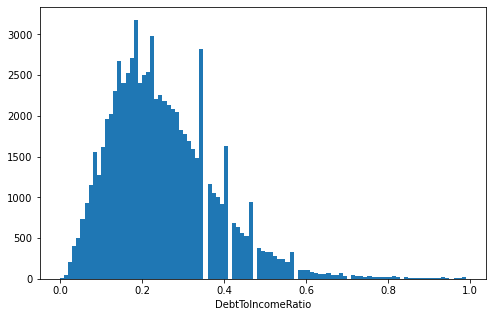

In [171]:
# plotting histogram distribution with a reduced bin size
binsize = 0.01
plt.figure(figsize = [8,5])
bins = np.arange(0, 1, 0.01)
plt.hist(data=sub_loans, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('DebtToIncomeRatio')

In the distribution plot of the DebtToIncomeRatio, there are spikes in frequency at 0.2 and 0.36. <br>
Majority of the borrower's have a debt-to-income ratio below 0.5% which is the maximum debt-to-income-ratio allowed.

### Question 4

Next up, checking the distribution of CreditScoreRange.<br>
Credit Scores are three digit numbers, typically between 300 and 900, designed to represent your credit risk, or the likelihood you will pay your bills on time. Those with higher credit scores generally recieve more favorable credit terms, which may translate into lower payments and lower Borrower Rates.<br>
Credit scores ranges vary based on the credit scoring model used, but are generally similar to the following:
- Poor: 300-579
- Fair: 580-699
- Good: 670-739 
- Very good:  740-799 
- Excellent: => 800 


Text(0.5, 0, 'CreditScoreRangeUpper ($)')

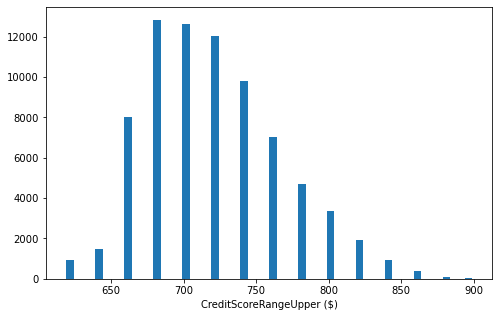

In [172]:
# histogram to show CreditScoreRange distribution
binsize = 5
plt.figure(figsize = [8,5])
bins = np.arange(619, sub_loans['CreditScoreRange'].max()+binsize, binsize)
plt.hist(data=sub_loans, x = 'CreditScoreRange', bins = bins)
plt.xlabel('CreditScoreRangeUpper ($)')

There is a high level of frequency from between approximately 680 to 725 after which it reduces and the distribution slopes downwards.<br>
Most of the borrowers have a between good and excellent credit scores.

In [173]:
sub_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76216 entries, 1 to 113936
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ListingNumber             76216 non-null  object  
 1   Term                      76216 non-null  int64   
 2   BorrowerRate              76216 non-null  float64 
 3   ListingCategory           76216 non-null  category
 4   BorrowerState             76216 non-null  object  
 5   Occupation                76216 non-null  object  
 6   ProsperRating             76216 non-null  category
 7   ProsperScore              76216 non-null  category
 8   EmploymentStatus          76216 non-null  category
 9   EmploymentStatusDuration  76216 non-null  int32   
 10  IsBorrowerHomeowner       76216 non-null  category
 11  CreditScoreRange          76216 non-null  int32   
 12  DebtToIncomeRatio         76216 non-null  float64 
 13  IncomeRange               76216 non-null  cat

### Question 5

Checking the distribution of Prosper Ratings and Prosper score

Prosper Score means the proprietary credit score assigned by the Company to each Borrower Loan and used by the Company in the calculation of Prosper Ratings<br>
It measures the amount of risk a lender can expect if a loan is approved

c:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


Text(0.5, 1.0, 'Prosper Score Distriution')

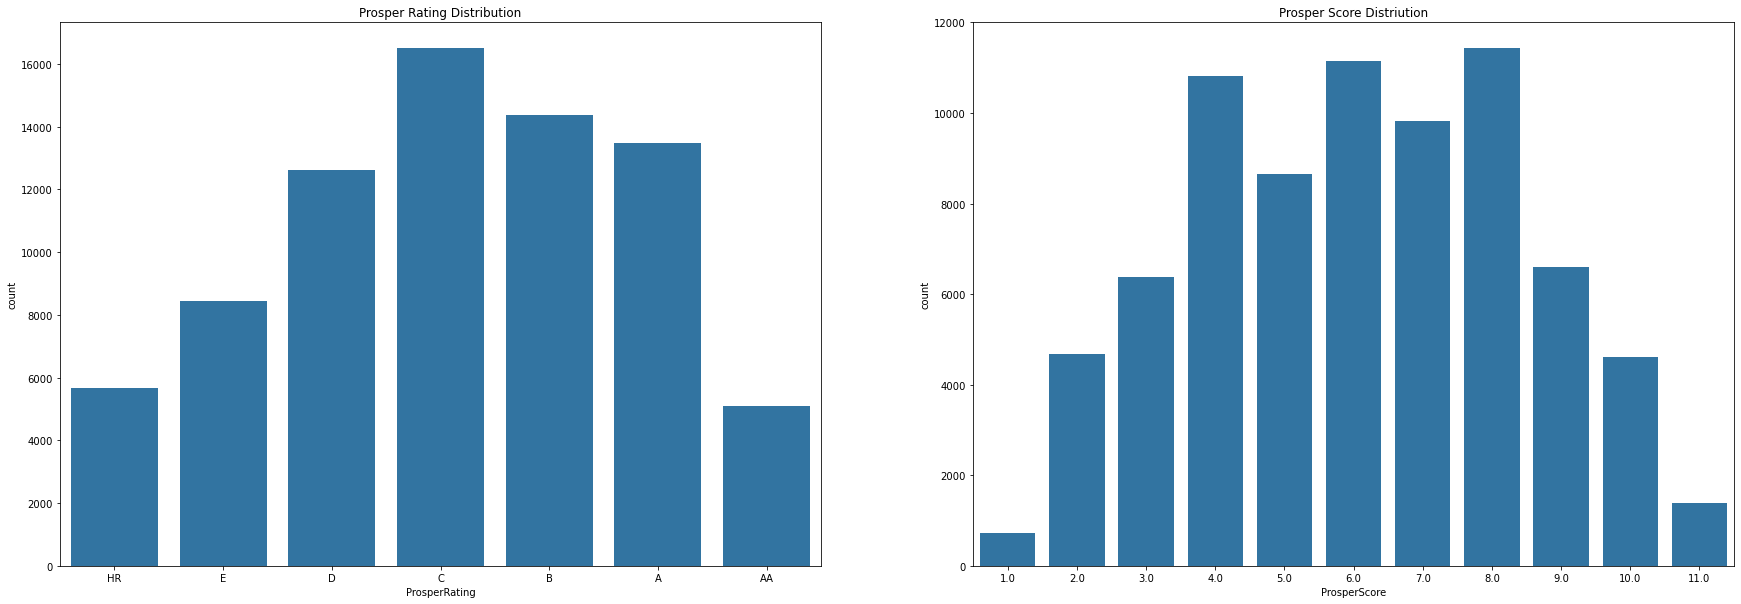

In [174]:
# univariate plots of ProsperRatings and PrrosperScore
plt.figure(figsize=[30,10])
base_color = sb.color_palette()[0]
plt.subplot(1,2, 1)
sb.countplot(data=sub_loans, x='ProsperRating',color=base_color)
plt.title('Prosper Rating Distribution')
plt.subplot(1,2,2)
sb.countplot(data=sub_loans, x='ProsperScore',color=base_color)
plt.title('Prosper Score Distriution')

Prosper Ratings C, B, A and D have the highest frequencies.
Prosper Score's distribution is trimodal at levels 4, 6, 8

### Question 6

Checking the distribution of income range

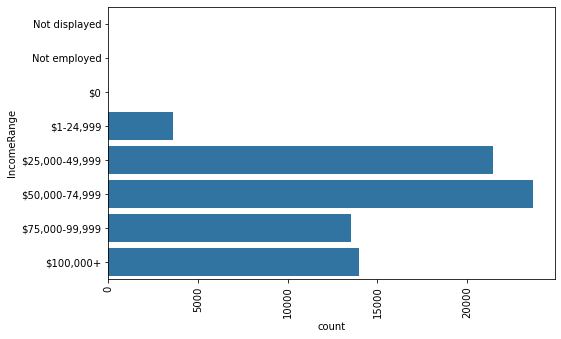

In [190]:
# univariate plot of Income Range
plt.figure(figsize=[8,5])
base_color = sb.color_palette()[0]
sb.countplot(data=sub_loans, y='IncomeRange',color=base_color)
plt.xticks(rotation=90);

Income Range $50000-74999 has the highest frequency

### Question 6

Checking the distribution of employment status duration

Text(0.5, 0, 'EmploymentStatusDuration (months)')

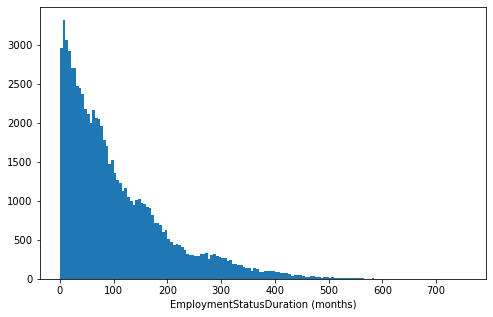

In [176]:
# histogram to show EmploymentStatusDuration distribution
binsize = 5
plt.figure(figsize = [8,5])
bins = np.arange(0, sub_loans['EmploymentStatusDuration'].max()+binsize, binsize)
plt.hist(data=sub_loans, x = 'EmploymentStatusDuration', bins = bins)
plt.xlabel('EmploymentStatusDuration (months)')

Employment status duration has a right tailed distribution, with the employment status duration of most borrowers falling between 0 and 100

### Question 7

Checking the distribution of Term

<AxesSubplot:xlabel='Term', ylabel='count'>

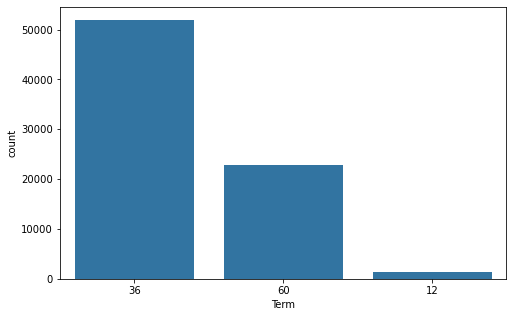

In [177]:
# univariate plot of Term
plt.figure(figsize=[8,5])
base_color = sb.color_palette()[0]
sb.countplot(data=sub_loans, x='Term',color=base_color, order=sub_loans.Term.value_counts().index)


Term is the length of the loan expressed in months. 36 months has the highest frequency

### Question 8

Checking the distribution of ListingCategory

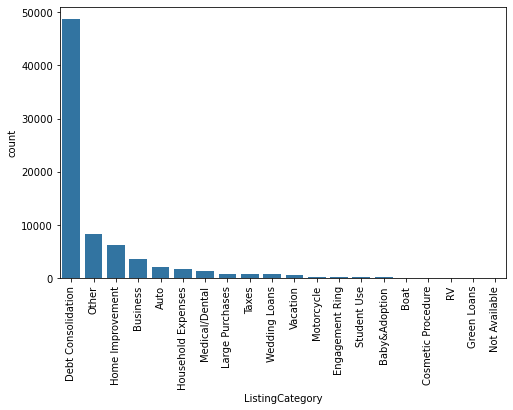

In [178]:
# univariate plot of EmploymentStatus
plt.figure(figsize=[8,5])
base_color = sb.color_palette()[0]
sb.countplot(data=sub_loans, x='ListingCategory',color=base_color, order=sub_loans.ListingCategory.value_counts().index)
plt.xticks(rotation=90);

Debt Consolidation has the highest frequency in the listings category. Most of the borrowers reason for taking a loan falls under this category

### Question 9

Checking the distribution of other variables

<AxesSubplot:xlabel='Occupation', ylabel='count'>

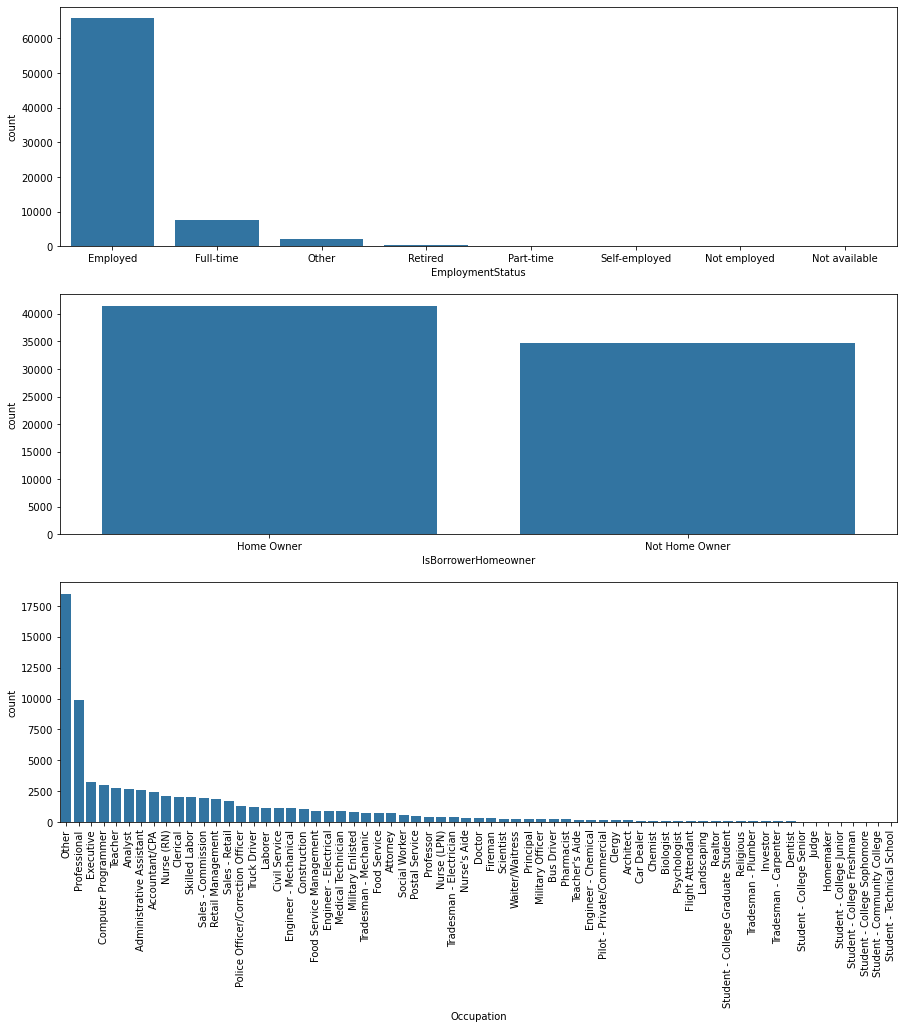

In [179]:
# univariate plots of other variables
fig, ax = plt.subplots(nrows=3, figsize = [15,15])
base_color = sb.color_palette()[0]
plt.xticks(rotation=90);
sb.countplot(data=sub_loans, x='EmploymentStatus', color=base_color, order=sub_loans.EmploymentStatus.value_counts().index, ax=ax[0])
sb.countplot(data=sub_loans, x='IsBorrowerHomeowner',color=base_color, order=sub_loans.IsBorrowerHomeowner.value_counts().index, ax=ax[1])
sb.countplot(data=sub_loans, x='Occupation',color=base_color, order=sub_loans.Occupation.value_counts().index, ax=ax[2])


Most borrowers' employment status is either employed or full time<br>
Approximately 60% of borrowers are homeowners.<br>
The common occupation among borrowers are professional, executive and administrative roles.<br>

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The BorrowerRate variable took a range of values of between 0.5 and 0.35.The distribution is unimodal at a peak of 0.32%. Most of the borrowers had a borrower rate of below 0.32%

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Whilst exploring the Debt to Income Ratio, the plot was scaled down to a range of 0.1 to 1.0 to have a closer look at the data and discover insights

## Bivariate Exploration

> In this section, i'll be investigating relationships between pairs of variables in the Prosper Loan data.

### Question 10
To start off with, I want to look at the pairwise correlations present between features in the data.

In [180]:
sub_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76216 entries, 1 to 113936
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ListingNumber             76216 non-null  object  
 1   Term                      76216 non-null  int64   
 2   BorrowerRate              76216 non-null  float64 
 3   ListingCategory           76216 non-null  category
 4   BorrowerState             76216 non-null  object  
 5   Occupation                76216 non-null  object  
 6   ProsperRating             76216 non-null  category
 7   ProsperScore              76216 non-null  category
 8   EmploymentStatus          76216 non-null  category
 9   EmploymentStatusDuration  76216 non-null  int32   
 10  IsBorrowerHomeowner       76216 non-null  category
 11  CreditScoreRange          76216 non-null  int32   
 12  DebtToIncomeRatio         76216 non-null  float64 
 13  IncomeRange               76216 non-null  cat

In [181]:
numeric_vars = ['BorrowerRate', 'EmploymentStatusDuration', 'CreditScoreRange', 'DebtToIncomeRatio', 'LoanOriginalAmount', 'Term']
categoric_vars = ['ProsperRating', 'ProsperScore', 'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeRange']

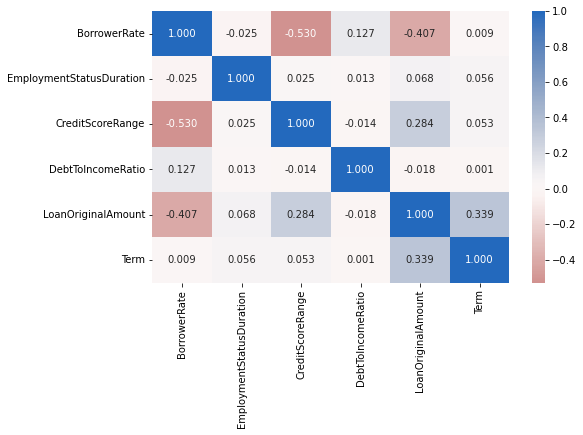

In [182]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(sub_loans[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

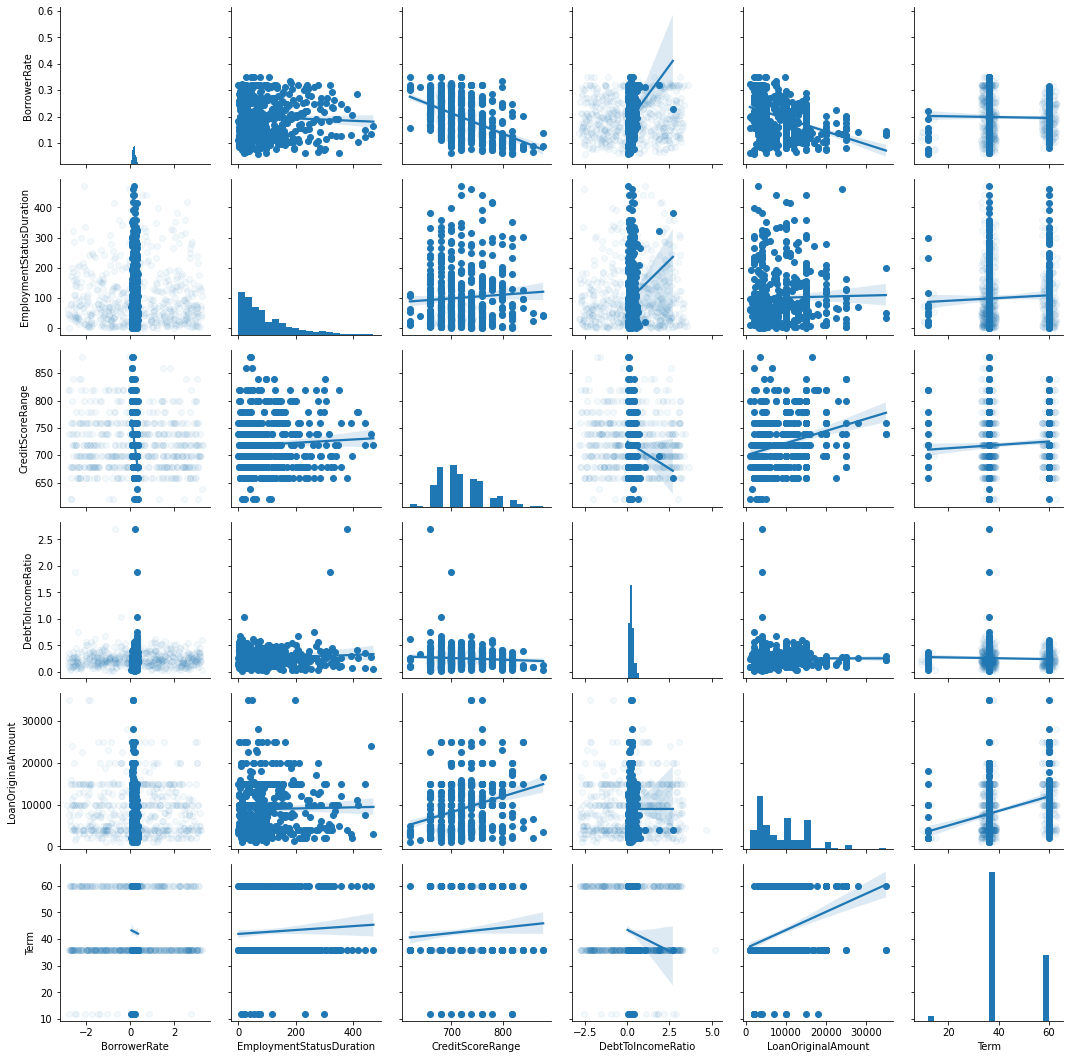

In [183]:
# plot matrix: sample 500 loans so that plots are clearer and
# they render faster
loans_samp = sub_loans.sample(n=500, replace=False)

g = sb.PairGrid(data = loans_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)
g.map_offdiag(sb.regplot, x_jitter=3, scatter_kws=({'alpha':1/20}))

There's no correlation whatsoever between BorroweRate and Employment Status Duration
There's a negative relationship between CreditScoreRange and BorrowerRate with a correlation coefficient of -0.530
There's a weak positive correlation between DebtToIncomeRatio and Borrower Rate with a correlation coefficient of 0.127
There's a weak negative relationship between LoanOriginalAmount and BorrowerRate with a correlation coefficient of -0.407
There's no correlation between BorroweRate and Loan Term


### Question 11
Let's move on to looking at how BorrowerRate and CreditScoreRange weight correlate with the categorical variables.

c:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
c:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


<Figure size 864x1080 with 0 Axes>

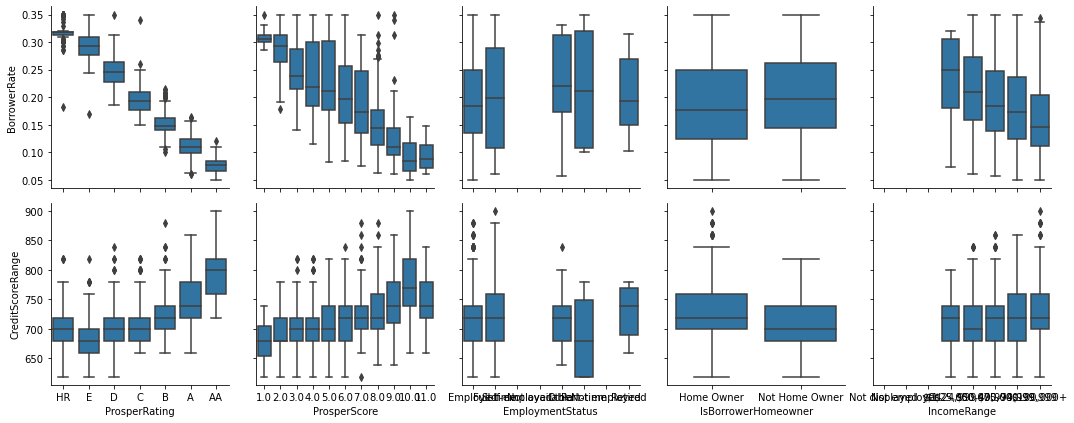

In [184]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

loans_samp = sub_loans.sample(n=2000, replace=False)


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color = default_color);

plt.figure(figsize = [12, 15]);
g = sb.PairGrid(data = loans_samp, y_vars = ['BorrowerRate', 'CreditScoreRange'], x_vars = ['ProsperRating', 'ProsperScore', 'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeRange'],
                height = 3, aspect = 1.);
g.map(boxgrid)
plt.show();

Interestingly, there's a strong negative relationship between ProsperScore and BorrowerRate. This indicates that the higher a borrower's ProsperScore, the lower the BorrowerRate.<br>
There's a high relationship between ProsperScore and CreditScoreRange. This means that borrowers with high prosper scores also have high a high CreditScoreRange

### Question 12
Finally, let's look at relationships between the categorical features.

c:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
c:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
c:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
c:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
c:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is depr

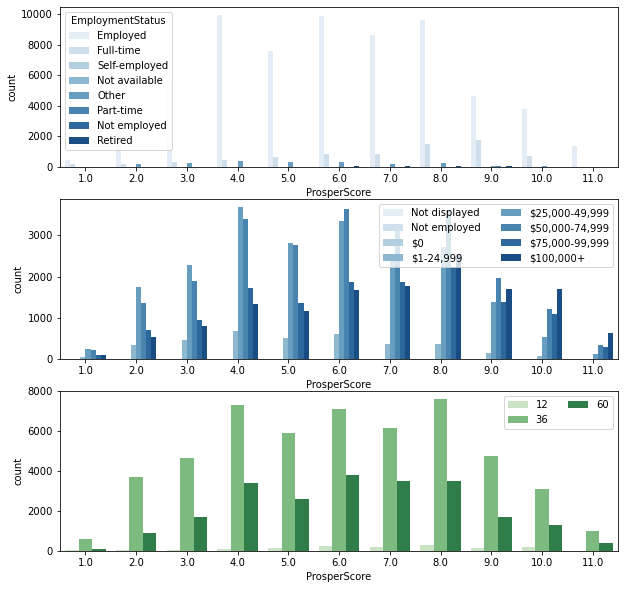

In [185]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [10, 10])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sb.countplot(data = sub_loans, x = 'ProsperScore', hue = 'EmploymentStatus', palette = 'Blues')

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sb.countplot(data = sub_loans, x = 'ProsperScore', hue = 'IncomeRange', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = sub_loans, x = 'ProsperScore', hue = 'Term', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

### Question 13
Viewing the relationship between Debt To Income Ratio and Borrower Rate

Text(0.5, 1.0, 'BorrowerRate (%) by Debt to Income Ratio')

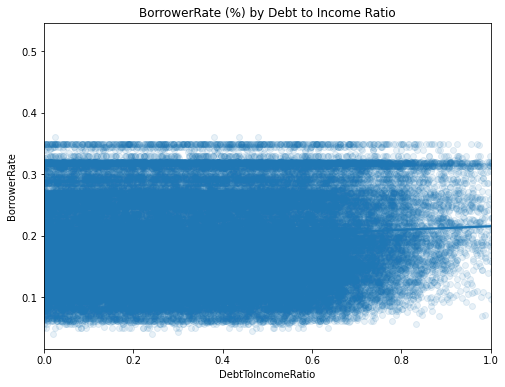

In [186]:
plt.figure(figsize=[8,6]);
sb.regplot(data=sub_loans, x='DebtToIncomeRatio', y='BorrowerRate', x_jitter=0.5, scatter_kws=({'alpha':1/10}));
plt.xlim(0,1);
plt.title('BorrowerRate (%) by Debt to Income Ratio')

There's a low positive relationship between borrower rate and debt to income ratio

### Question 14
Viewing the relationship between LoanOriginalAmount and DebtToIncomeRatio

Text(0.5, 1.0, 'Loan Original Amount (%) by Debt to Income Ratio')

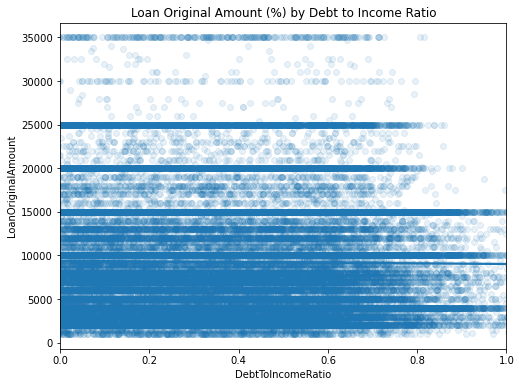

In [187]:
plt.figure(figsize=[8,6]);
sb.regplot(data=sub_loans, x='DebtToIncomeRatio', y='LoanOriginalAmount', x_jitter=0.5, scatter_kws=({'alpha':1/10}));
plt.xlim(0,1);
plt.title('Loan Original Amount (%) by Debt to Income Ratio')

There's a no relationship between debt to income ratio and loan original amount

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> CreditScoreRange has a strong negative relationship with BorrowerRate. I discovered that borrowers with a high CreditScore range have better chances at getting low borrower rates.<br>
Interestingly, there's also a strong negative relationship between ProsperScore and BorrowerRate. This indicates that the higher a borrower's ProsperScore, the lower the BorrowerRate.This is due to the fact that a low prosperscore translates to a high risk of defaulting on loan payments.<br>



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There's a high negative relationship between ProsperScore and CreditScoreRange. This means that borrowers with high prosper scores also have high a high CreditScoreRange.<br>
There's also a strong relationship between Loan Original Amount and Debt to Income ratio

## Multivariate Exploration

> The main thing I want to explore in this part of the analysis is how the Loan Term plays into the relationship between price and ProsperScore.

c:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
c:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


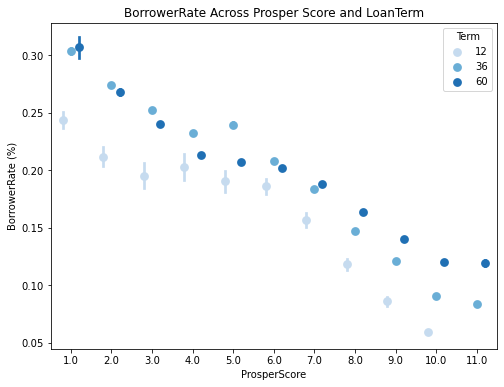

In [188]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = sub_loans, x = 'ProsperScore', y = 'BorrowerRate', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('BorrowerRate Across Prosper Score and LoanTerm')
plt.ylabel('BorrowerRate (%)')
plt.xlabel('ProsperScore')
plt.show();

This plot distribution shows that borrowers with higher(i.e better) ProsperScore and longer loan terms are more likely to get lower Borrower Rate

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I extended my investigation of Borrower Rate against ProsperScore in this section by looking at the impact of Loan Term. The multivariate exploration here showed Loan Term is an important factor for fixing Borrower Rate. Prosper Score also influences the Borrower Rate. This means that the higher the Prosper Score and the longer the Loan Term , the smaller the Borrower Rate
### Were there any interesting or surprising interactions between features?
> Looking back at the explorations carried out, i was surprised to find out that debt to income ratio has little effect on the Borrower Rate

## Conclusions
> I started out this exploration by importing my dataset and performing some preliminary data wrangling. Next, i created a subset of the dataframe containing variables i was interested in exploring. After this , i performed univariate, bivariate and multivariate explorations. 
During my explorations, i  discovered that to  be able to get a lower Borrower Rate, you have to have a high Prosper Score. A high prosper score shows that you'll be able to pay back your loan and thus making you less of a risk.<br>
I also discovered that there's a strong negative relationship between Borrower Rate and Credit Score Range. This means that customers with a high credit score range are more likely to get low borrower rate. This makes sense as a high credit score means that the customer has an history of paying bills on time and therefore will also have a high probability of paying back the loan thereby making them low risk.